In [1]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data"

# Display data
mammo_masses_data = pd.read_csv(url)

# Printing first 5 rows just to make sure data can be accessed, and also to see what it looks like
mammo_masses_data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [3]:
# Shape
print(mammo_masses_data.shape)

(960, 6)


In [4]:
# Convert missing data indicated by a ? into NaN 
# And add the appropriate column names 

# BI-RADS assessment: 0 to 5 
#-- 0: A score of 0 does not mean that there are no findings of concern.
#-- 1 to 2: Scores of 1 or 2 basically "look okay" and describe reports in which either nothing abnormal is seen, benign breast conditions. This does not mean that you are not at risk for breast cancer or could not have breast cancer. 
#-- 3 to 5: A score over 3 means that you will require some type of follow-up. 
# Age: patient's age in years (integer) 
# Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal) 
# Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal) 
# Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal) 
# Severity: benign=0 or malignant=1 (binominal, goal field)
    
mammo_masses_data = pd.read_csv(url, na_values=['?'], names = ['birads', 'age', 'shape', 'margin', 'density', 'severity'])

mammo_masses_data.head()

,birads,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [5]:
# Statistical description
mammo_masses_data.describe()

,birads,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [6]:
mammo_masses_data['birads'] = mammo_masses_data['birads'].replace([55.0, 6.0], 5.0)
mammo_masses_data.describe()

,birads,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.284672,55.487448,2.721505,2.796276,2.910734,0.463059
std,0.686345,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [7]:
# See the rows that have missing values
mammo_masses_data.loc[(mammo_masses_data['birads'].isnull()) |
                      (mammo_masses_data['age'].isnull()) |
                      (mammo_masses_data['shape'].isnull()) |
                      (mammo_masses_data['margin'].isnull()) |
                      (mammo_masses_data['density'].isnull())]

,birads,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
9,5.0,60.0,NaN,5.0,1.0,1
12,4.0,64.0,1.0,NaN,3.0,0
19,4.0,40.0,1.0,NaN,NaN,0
20,NaN,66.0,NaN,NaN,1.0,1
22,4.0,43.0,1.0,NaN,NaN,0


In [8]:
# Quite a lot of rows with missing data
# Cannot just delete every row that's missing data, cannot make the data bias
# But since missing data is random, and not too many rows out of the whole dataset, 
# can drop the rows with missing values
mammo_masses_data.dropna(inplace=True)
mammo_masses_data.describe()

,birads,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.322892,55.781928,2.781928,2.813253,2.915663,0.485542
std,0.669394,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [9]:
# Class distribution to see how many are severe
print(mammo_masses_data.groupby('severity').size())

severity
0    427
1    403
dtype: int64


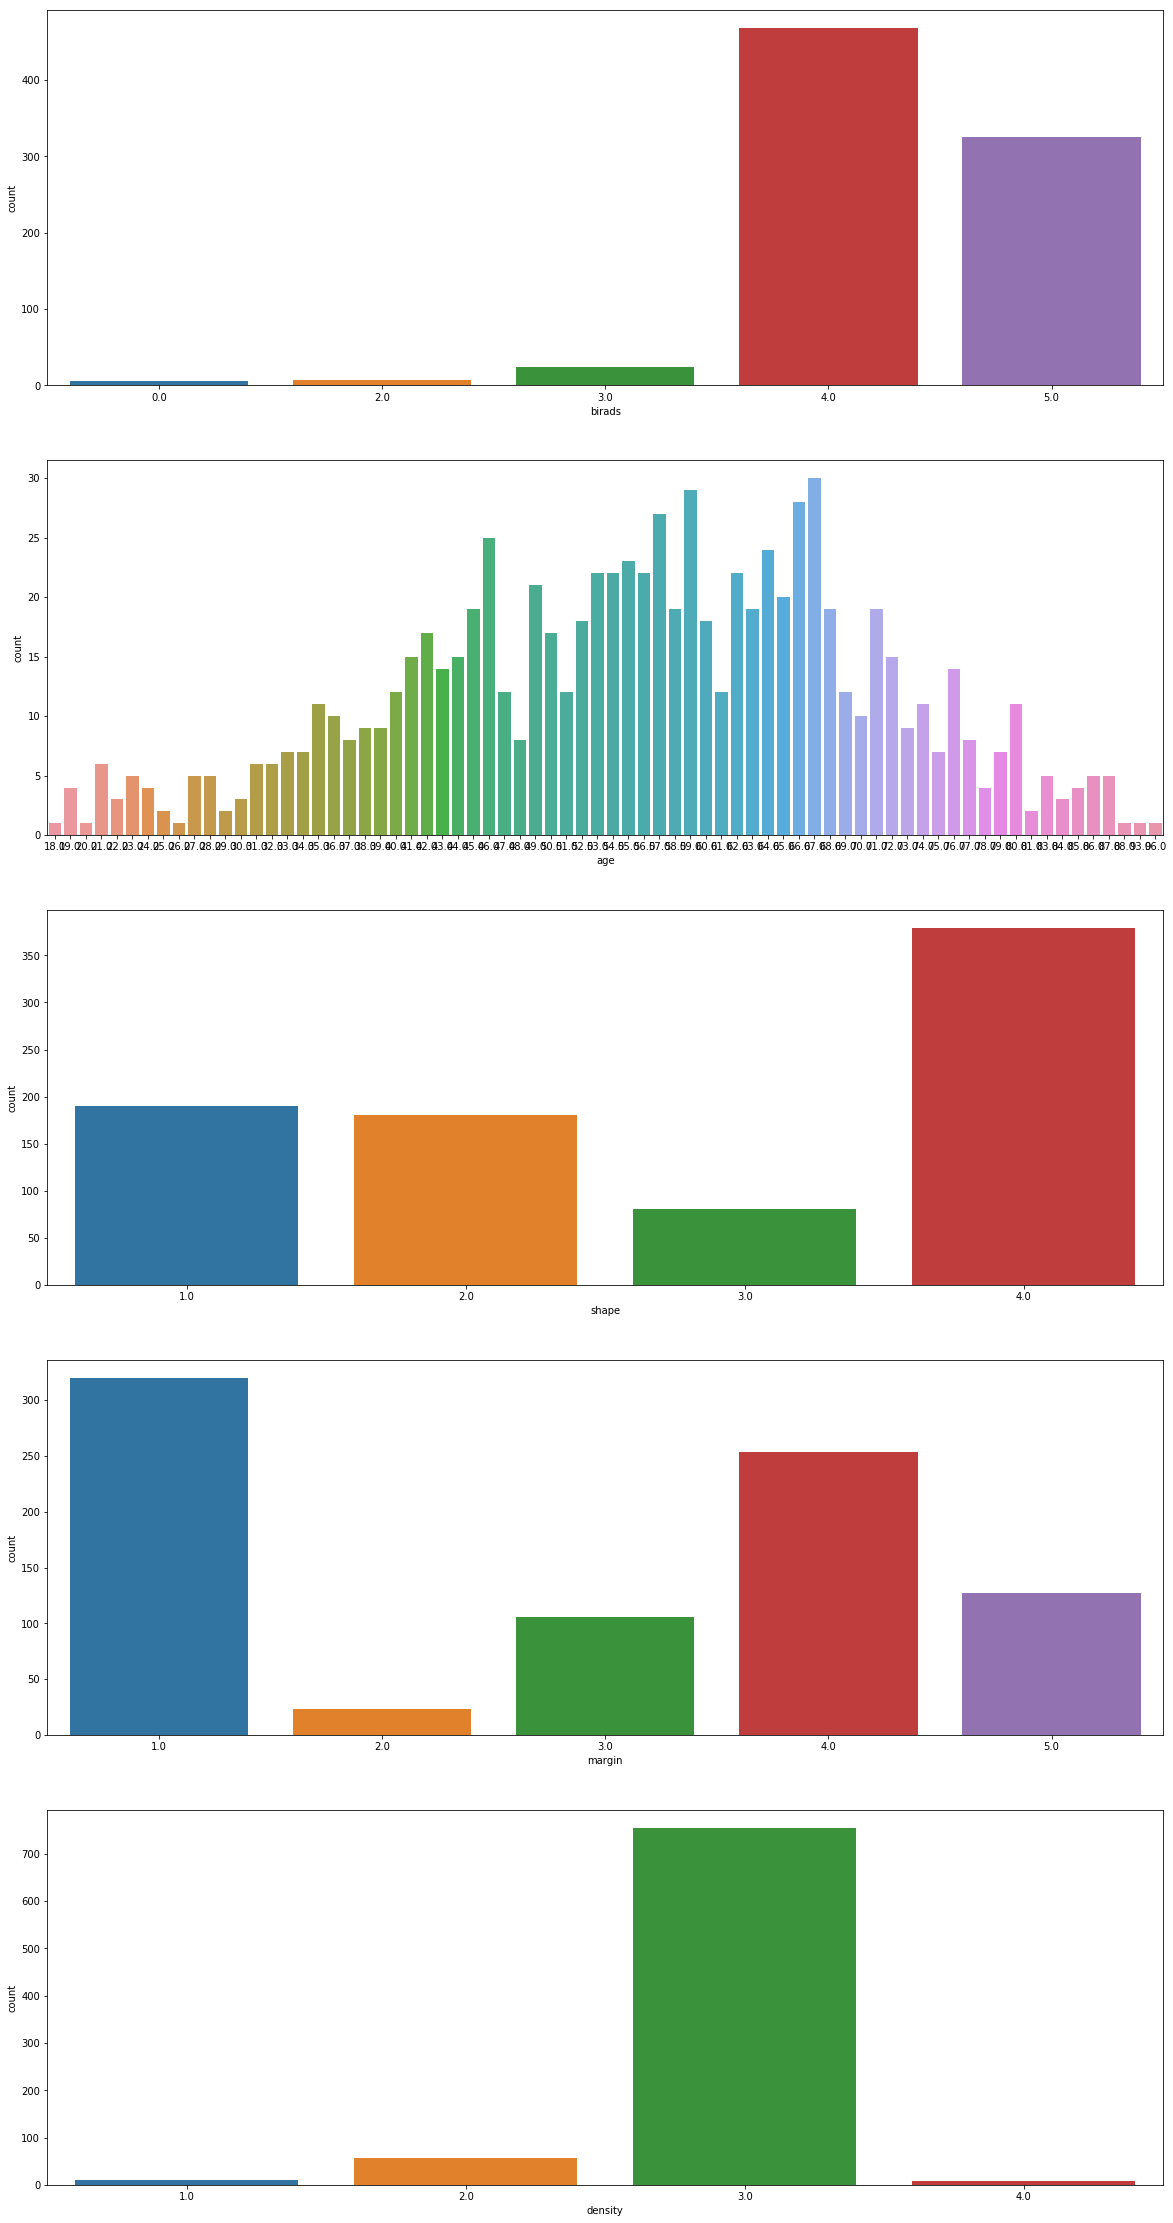

In [10]:
# Histograms
# mammo_masses_data.hist()
# plt.show()

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(20,40))
sns.countplot(x='birads', data=mammo_masses_data, ax=ax1)
sns.countplot(x='age', data=mammo_masses_data, ax=ax2)
sns.countplot(x='shape', data=mammo_masses_data, ax=ax3)
sns.countplot(x='margin', data=mammo_masses_data, ax=ax4)
sns.countplot(x='density', data=mammo_masses_data, ax=ax5)

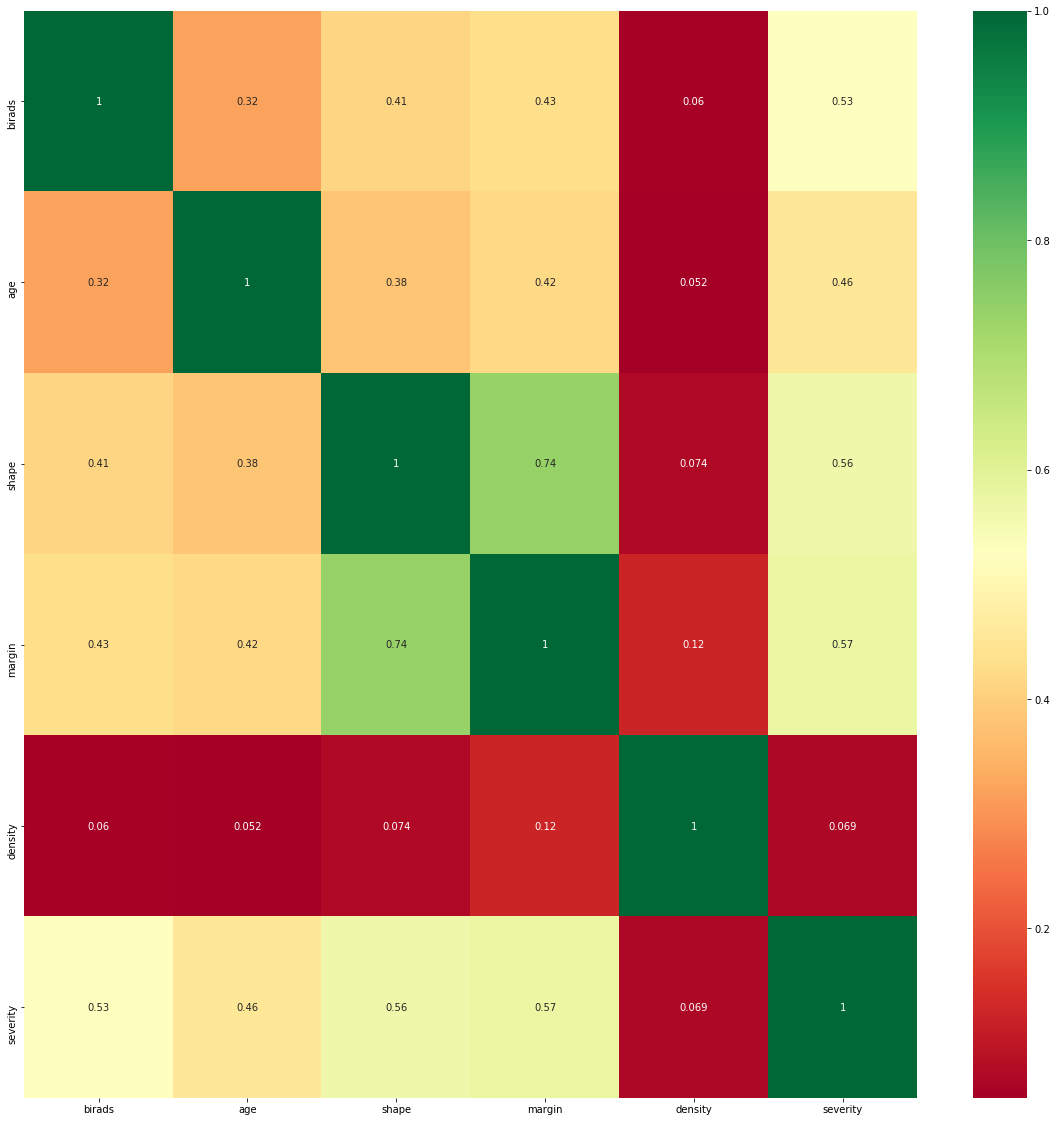

In [11]:
# Features
X = mammo_masses_data.iloc[:,1:5]  
# Classes / target
y = mammo_masses_data.iloc[:,-1]    

# Get correlations of each features in dataset
corrmat = mammo_masses_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
g=sns.heatmap(mammo_masses_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Margin and Shape are highly correlated to each other hence I will delete one of them 
# I will delete the Shape since it's slightly less correlated to the result variable (Severity)

In [12]:
del mammo_masses_data['shape']

In [13]:
#Shuffle the data 
np.random.seed(18)
mammo_masses_data_shuffle = mammo_masses_data.iloc[np.random.permutation(len(mammo_masses_data))]

In [14]:
# Convert the Pandas dataframes into numpy arrays that can be used by scikit_learn
all_data = mammo_masses_data_shuffle[['birads', 'age', 'margin', 'density', 'severity']].values

# Create array of only the feature data 
features = mammo_masses_data_shuffle[['birads', 'age', 'margin', 'density']].values

# Separate array to contain Severity
classes = mammo_masses_data_shuffle['severity'].values

# Also need array of the feature names - this will help later when exploring the data
feature_names = ['birads', 'age', 'margin', 'density']

# print the features array of feature data
features

array([[ 5., 57.,  4.,  2.],
       [ 5., 87.,  5.,  3.],
       [ 4., 35.,  1.,  3.],
       ...,
       [ 5., 81.,  4.,  3.],
       [ 4., 88.,  4.,  3.],
       [ 4., 72.,  1.,  3.]])

In [15]:
# Save the new mammographic masses data csv
df = pd.DataFrame(all_data, columns = ['birads', 'age', 'margin', 'density', 'severity'])

df.to_csv('new_mammographic_masses.csv')

In [16]:
# Normalize the attribute data using preprocessing.StandardScaler() 
# Normalization means adjusting values measured on different scales to a common scale
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 1.01213463,  0.08307148,  0.75770912, -2.6107745 ],
       [ 1.01213463,  2.12904574,  1.39618483,  0.24046607],
       [-0.48265495, -1.41730963, -1.157718  ,  0.24046607],
       ...,
       [ 1.01213463,  1.71985089,  0.75770912,  0.24046607],
       [-0.48265495,  2.19724488,  0.75770912,  0.24046607],
       [-0.48265495,  1.10605861, -1.157718  ,  0.24046607]])

In [17]:
import numpy
from sklearn.model_selection import train_test_split

# X_train, X_validation, Y_train, Y_validation
    
# numpy.random.seed(18)
seed = 18
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(features_scaled, 
                                     classes, 
                                     test_size=0.30, 
                                     train_size=0.70, 
                                     random_state=seed)

In [18]:
# DecisionTreeClassifier, fit to training data
clf= DecisionTreeClassifier(random_state=seed)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=18,
            splitter='best')

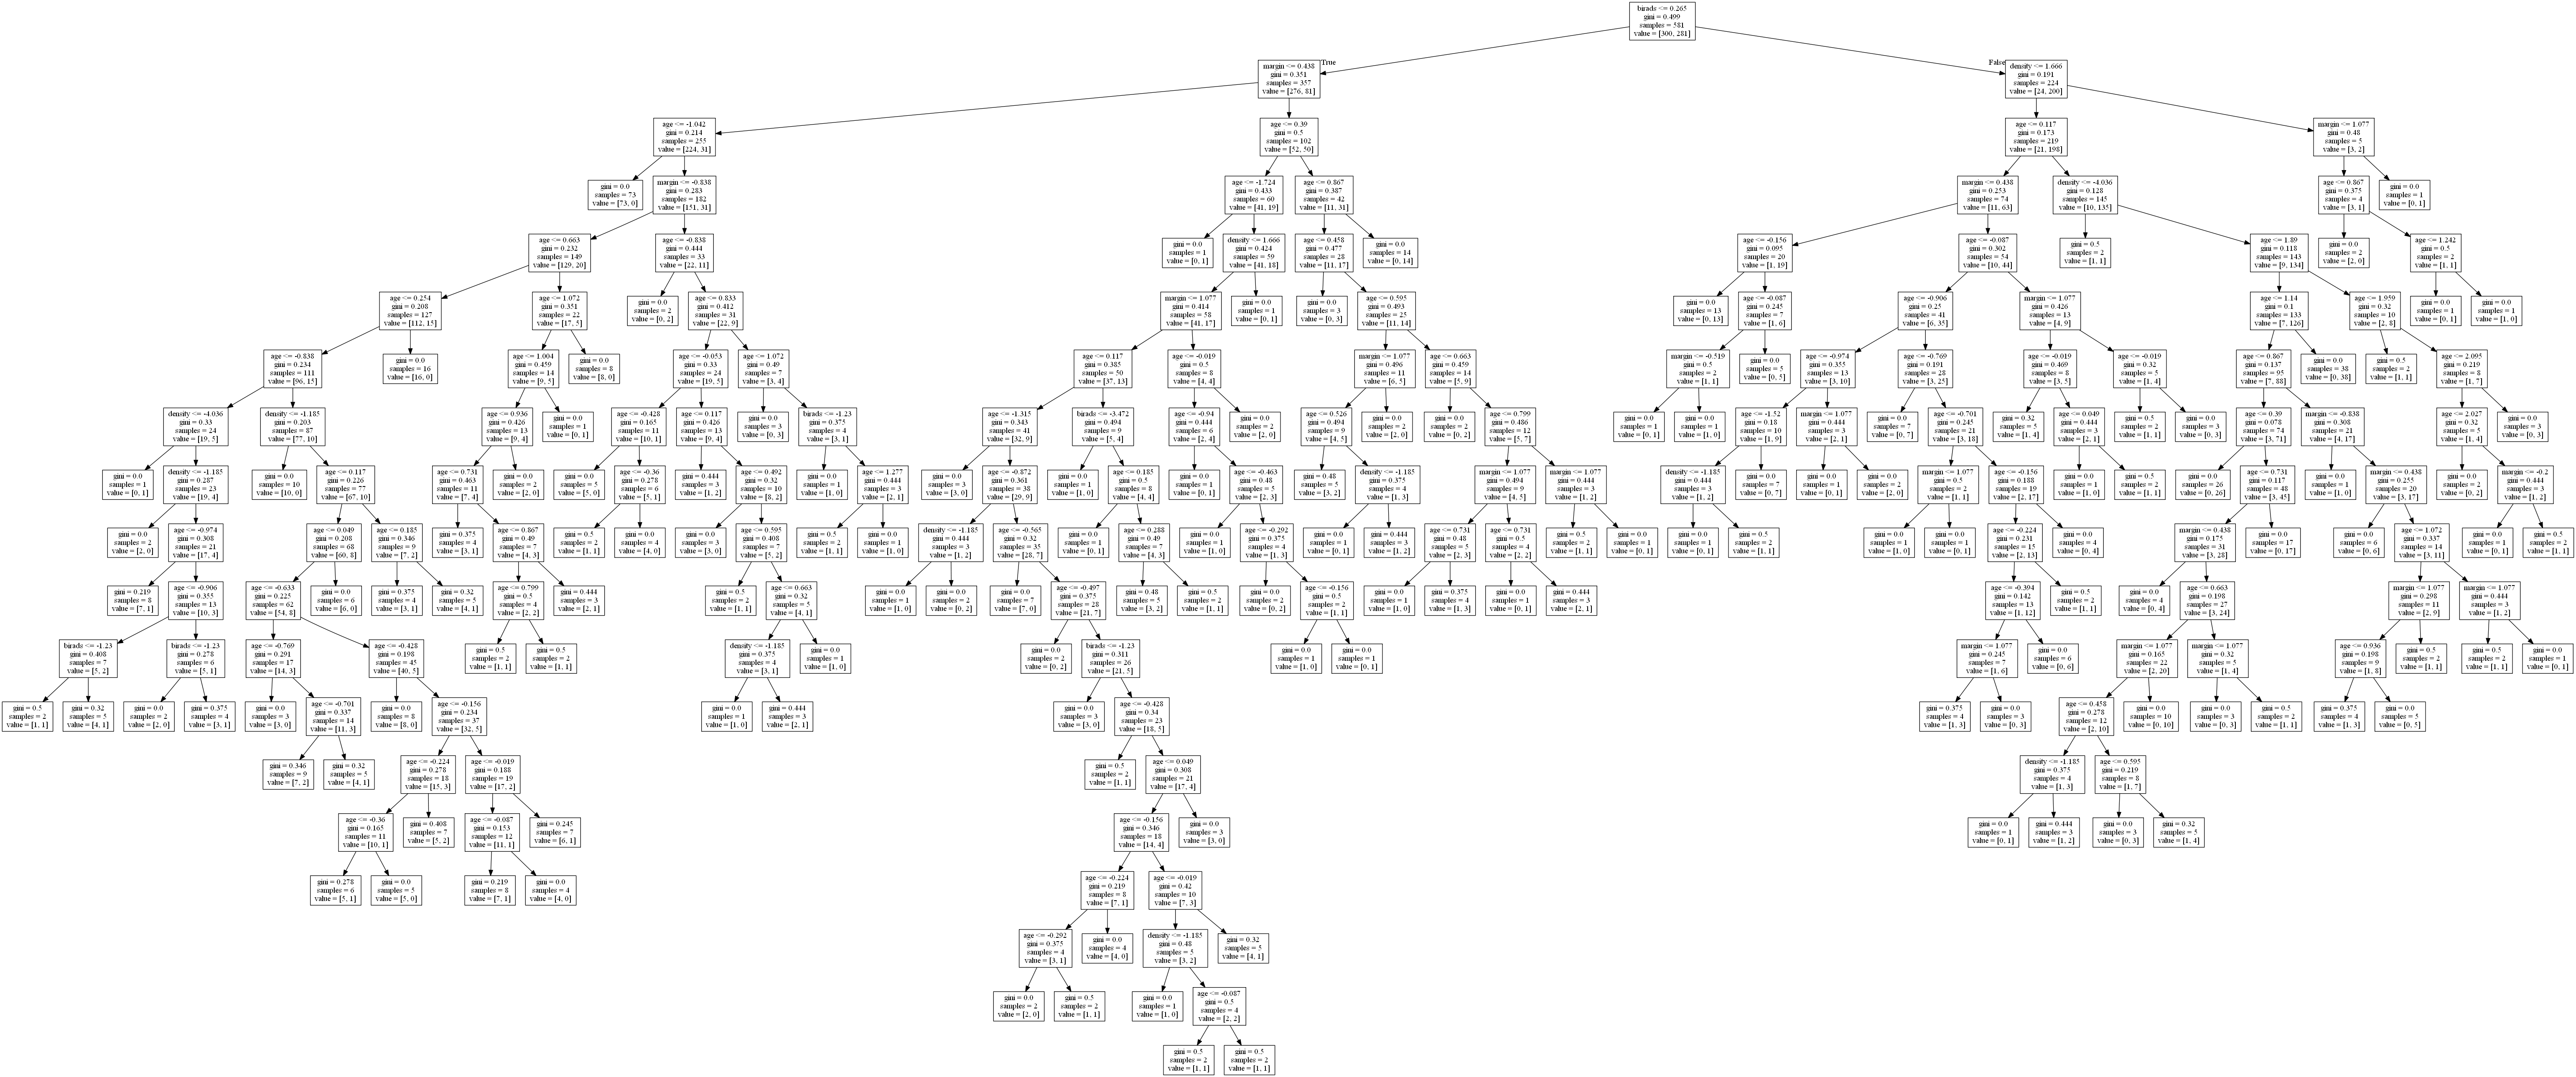

In [19]:
# Display the resulting decision tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [20]:
# Using test data to measure the accuracy of the decision tree model 
clf.score(testing_inputs, testing_classes)

0.8032128514056225

In [21]:
# Using K-Fold cross validation to measure of your model's accuracy (K=10)
clf = DecisionTreeClassifier(random_state=seed)
cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)

cv_scores.mean()

0.7857125365573794

In [22]:
# Using RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=seed)
cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)

cv_scores.mean()

0.7843772301750557

In [23]:
# SVM
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)

cv_scores = cross_val_score(svc, features_scaled, classes, cv=10)

cv_scores.mean()

0.8274932482543415

In [24]:
# svm.SVC may perform differently with different kernels
# Try sigmoid kernel
C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
cv_scores = cross_val_score(svc, features_scaled, classes, cv=10)

cv_scores.mean()

0.7662157340162042

In [25]:
# Try poly kernel
C = 1.0
svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc, features_scaled, classes, cv=10)

cv_scores.mean()

0.8144273959951303

In [26]:
# KNeighborsClassifier
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)

cv_scores.mean()

0.8239508556875587

In [27]:
# Trying different values for KNeighborsClassifier 
# Using for loop to run KNeighborsClassifier with different values 
# See if difference in values makes a substantial difference. 

for i in range(1, 20):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)
    print (i, cv_scores.mean())
    
# The best in this range is k=18

1 0.7843621874256608
2 0.7806179421518828
3 0.8035392440843514
4 0.819173908176259
5 0.8167642696220423
6 0.819159914921008
7 0.8227453367476876
8 0.82512628912864
9 0.825169668219918
10 0.8239508556875587
11 0.8203934203713811
12 0.8275803562682787
13 0.8155454570896827
14 0.827565663350265
15 0.8227166505744231
16 0.8239655486055721
17 0.8227747225837148
18 0.8287851755453872
19 0.8275509704322518


In [28]:
clf = neighbors.KNeighborsClassifier(n_neighbors=18)
cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)

cv_scores.mean()

0.8287851755453872

In [29]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
features_minmax = scaler.fit_transform(features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, features_minmax, classes, cv=10)

cv_scores.mean()

0.7195300365223962

In [30]:
#GaussianNB
clf = GaussianNB()
cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)

cv_scores.mean()

0.8107839021591593

In [31]:
# Logistic Regression 
clf = LogisticRegression()
cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)

cv_scores.mean()

0.831296964862936

In [32]:
# LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(clf, features_scaled, classes, cv=10)

cv_scores.mean()

0.8204665351300673

In [33]:
# DecisionTreeClassifier: 0.7857125365573794
# RandomForestClassifier: 0.7843772301750557

# SVM (linear kernel): 0.8274932482543415
# -- sigmoid kernel: 0.7662157340162042
# -- poly kernel: 0.8144273959951303

# KNeighborsClassifier (n_neighbors=18): 0.8287851755453872

# Multinomial Naive Bayes: 0.7195300365223962
# GaussianNB: 0.8107839021591593
# Logistic Regression: 0.831296964862936
# LinearDiscriminantAnalysis: 0.8204665351300673

# Logistic Regression is the best algorithm.

In [34]:
# Make predictions with testing data
lr = LogisticRegression()

lr.fit(training_inputs, training_classes)
predictions = lr.predict(testing_inputs)
print("Accuracy:")
print(accuracy_score(testing_classes, predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(testing_classes, predictions))
print()
print("Classification report:")
print(classification_report(testing_classes, predictions))

Accuracy:
0.8473895582329317

Confusion matrix:
[[106  21]
 [ 17 105]]

Classification report:
             precision    recall  f1-score   support

          0       0.86      0.83      0.85       127
          1       0.83      0.86      0.85       122

avg / total       0.85      0.85      0.85       249



In [35]:
import pickle

# Save the trained model to a file so we can use it in other programs 
# joblib.dump(lr, 'models//trained_mammographic_model.pkl')

pickle.dump(lr, open('models//trained_mammographic_model.pkl', 'wb'))

In [36]:
# knc_model = joblib.load(open('models//trained_mammographic_model.pkl', 'rb'))
lr_model = pickle.load(open('models//trained_mammographic_model.pkl', 'rb'))

In [37]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
print(classification_report(testing_classes, lr_model.predict(testing_inputs)))
# To prove that it is the same model that was saved (dumped) and loaded

             precision    recall  f1-score   support

          0       0.86      0.83      0.85       127
          1       0.83      0.86      0.85       122

avg / total       0.85      0.85      0.85       249



In [43]:
# Inputing feature data to see the output value of severity
import numpy as np

birads = 5.
age = 27.
margin = 1.
density = 1.

# Need to normalize the testing data before getting an accurate result 
# Use the same scaler factors on the new data
scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)

data = np.array([[birads, age, margin, density]])
data_scaled = scaler.transform(data)
data_scaled

array([[ 1.01213463, -1.96290277, -1.157718  , -5.46201508]])

In [44]:
# Make a prediction against prediction features
prediction = lr_model.predict(data_scaled)
print(prediction)

if prediction == 0:
    print("Mammographic mass is likely to be benign - there is a low chance of breast cancer.")
elif prediction == 1:
    print("Mammographic mass is likely to be malignant - there is a high chance of breast cancer.")
else:
    print("Unable to make a prediction.")

[0]
Mammographic mass is likely to be benign - there is a low chance of breast cancer.
